# Part 1 Business problem - Music Recommendation System


#### Context
You have a dataset that contains detailed information about songs, including musical characteristics, popularity, and metadata related to albums and playlists. The goal is to create a recommendation system that can suggest relevant songs to users based on their musical interests, known and liked songs, or general preferences.

#### Objective
Develop a recommendation system model that can suggest songs from an existing database using features such as `danceability`, `energy`, `valence`, among others. This system should be able to provide personalized recommendations for specific users or playlists, increasing user engagement and satisfaction.

#### Justification
In the competitive digital music market, accurate and personalized recommendations are crucial for maintaining user engagement and promoting new songs. An effective recommendation system can not only increase playtime and user satisfaction but also help discover new talents and songs that align with the preferences of different audience segments.

### Methodology

1. **Exploratory Data Analysis (EDA):**
   - **Objective:** Understand the data distribution, detect outliers, and explore correlations between musical features and popularity.
   - **Tasks:**
     - Analyze the distribution of continuous variables (`danceability`, `energy`, `tempo`, etc.).
     - Explore the correlation between popularity (`track_popularity`) and musical characteristics.

2. **Data Preprocessing:**
   - **Objective:** Prepare the data for the recommendation model.
   - **Tasks:**
     - Normalize continuous variables to ensure they are on the same scale.
     - Handle missing values or inconsistencies in the data.

3. **Building the Recommendation Model:**
   - **Content-Based Filtering:**
     - **Objective:** Recommend songs similar to those based on their characteristics.
     - **Method:** Use KNN (K-Nearest Neighbors) with cosine similarity metric.
   - **Collaborative Filtering (if applicable):**
     - **Objective:** Recommend songs based on similar preferences of other users (if user interaction data is available).
   - **Hybrid Systems:**
     - **Objective:** Combine content-based and collaborative recommendations to improve accuracy.

4. **Model Evaluation:**
   - **Objective:** Measure the effectiveness of the recommendations.
   - **Metrics:**
     - Recommendation accuracy (can be measured by RMSE if evaluation data is available).
     - Acceptance rate of recommendations (if interaction data is available).
   - **Tasks:**
     - Test different `k` values in KNN.
     - Validate the model with a test dataset.

5. **Implementing the Recommendation System:**
   - **Objective:** Integrate the model into an application or service where it can provide real-time recommendations.
   - **Tasks:**
     - Create an API or web service that consumes the recommendation model.
     - Implement a feedback mechanism to improve recommendations over time.

6. **Monitoring and Continuous Improvement:**
   - **Objective:** Maintain the effectiveness of the recommendation system over time.
   - **Tasks:**
     - Monitor the model's performance after deployment.
     - Periodically adjust and retrain the model with new data.

### Expected Results
- **Relevant Recommendations:** The system should provide song recommendations that align with user preferences or the characteristics of specific songs.
- **Increased Engagement:** The system is expected to increase playtime and user satisfaction.
- **Discovery of New Music:** The system should help users . If you need more details or adjustments, I'm here to help!

In [6]:
# Installing packages
!pip install watermark
!pip install numpy pandas matplotlib seaborn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 5.5 MB/s eta 0:00:005.7 MB/s eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 4.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 5.5 MB/s eta 0:00:005.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.0 MB/s eta 0:00:005.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 4.6 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 4.9 MB/s eta 0:00:00m eta 0:00:010:01:02


In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
# Import of libraries

# System libraries
import re
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Machine learning
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

ModuleNotFoundError: No module named 'plotly'

# Part 2 - Database

In [4]:
# Database
df = pd.read_csv("/kaggle/input/30000-spotify-songs/spotify_songs.csv")
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [5]:
# Viewing first 5 data
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [6]:
# Viewing 5 latest data
df.tail()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432
32832,29zWqhca3zt5NsckZqDf6c,Typhoon - Original Mix,Julian Calor,27,0X3mUOm6MhxR7PzxG95rAo,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-4.571,0,0.0385,0.000133,0.341000,0.7420,0.0894,127.984,337500


In [7]:
# Info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [8]:
# Type data
df.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [9]:
# Viewing rows and columns
df.shape

(32833, 23)

In [10]:
# Copy data
data = df.copy()

# Part 2 - Exploratory data analysis

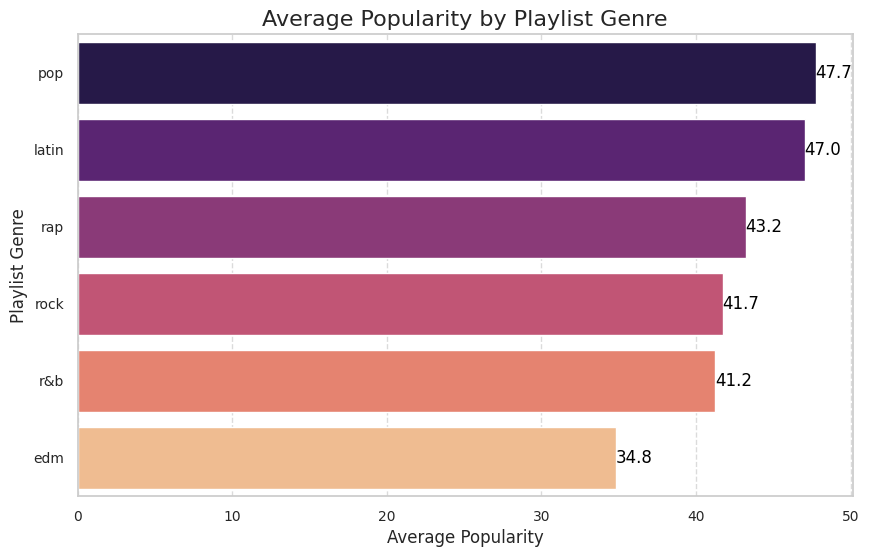

In [11]:
# Average popularity by playlist genre, sorted in descending order
playlist_popularity = data.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

# Plotting with improvements
plt.figure(figsize=(10, 6))
sns.barplot(x=playlist_popularity.values, y=playlist_popularity.index, palette='magma')

# Adding data labels
for index, value in enumerate(playlist_popularity.values):
    plt.text(value, index, f'{value:.1f}', va='center', ha='left', color='black')

# Enhancing readability
plt.title('Average Popularity by Playlist Genre', fontsize=16)
plt.xlabel('Average Popularity', fontsize=12)
plt.ylabel('Playlist Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adding gridlines for comparison
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

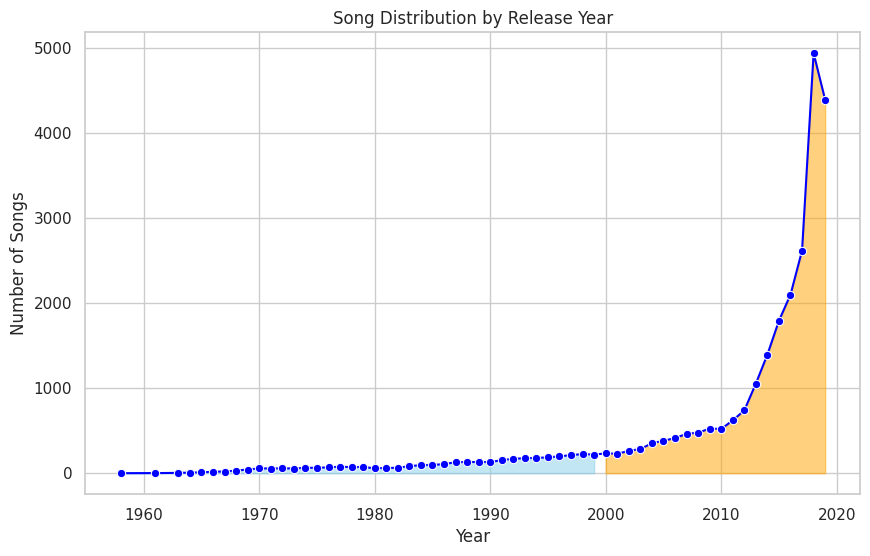

In [12]:
# Assuming your DataFrame is named df and has a 'track_album_release_date' column
data['year'] = pd.to_datetime(data['track_album_release_date'], errors='coerce').dt.year

# Counting the number of songs released each year
yearly_tracks = data['year'].value_counts().sort_index()

# Now, proceed with the rest of your code:
# Removing the most recent year if it's incomplete
yearly_tracks = yearly_tracks[yearly_tracks.index < 2023]  # Adjust the year based on your dataset

# Smoothing the trend with a rolling average
yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()

# Plotting the smoothed trend with annotations and color coding
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_tracks_smoothed.index, y=yearly_tracks_smoothed.values, marker='o', color='blue')
plt.title('Song Distribution by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)

# Adding annotations for key points
max_year = yearly_tracks.idxmax()
max_value = yearly_tracks.max()
plt.annotate(f'Maximum in {max_year}', xy=(max_year, max_value), xytext=(max_year-10, max_value + 500),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

# Color coding different eras
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index < 2000, color='skyblue', alpha=0.5)
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index >= 2000, color='orange', alpha=0.5)

plt.show()

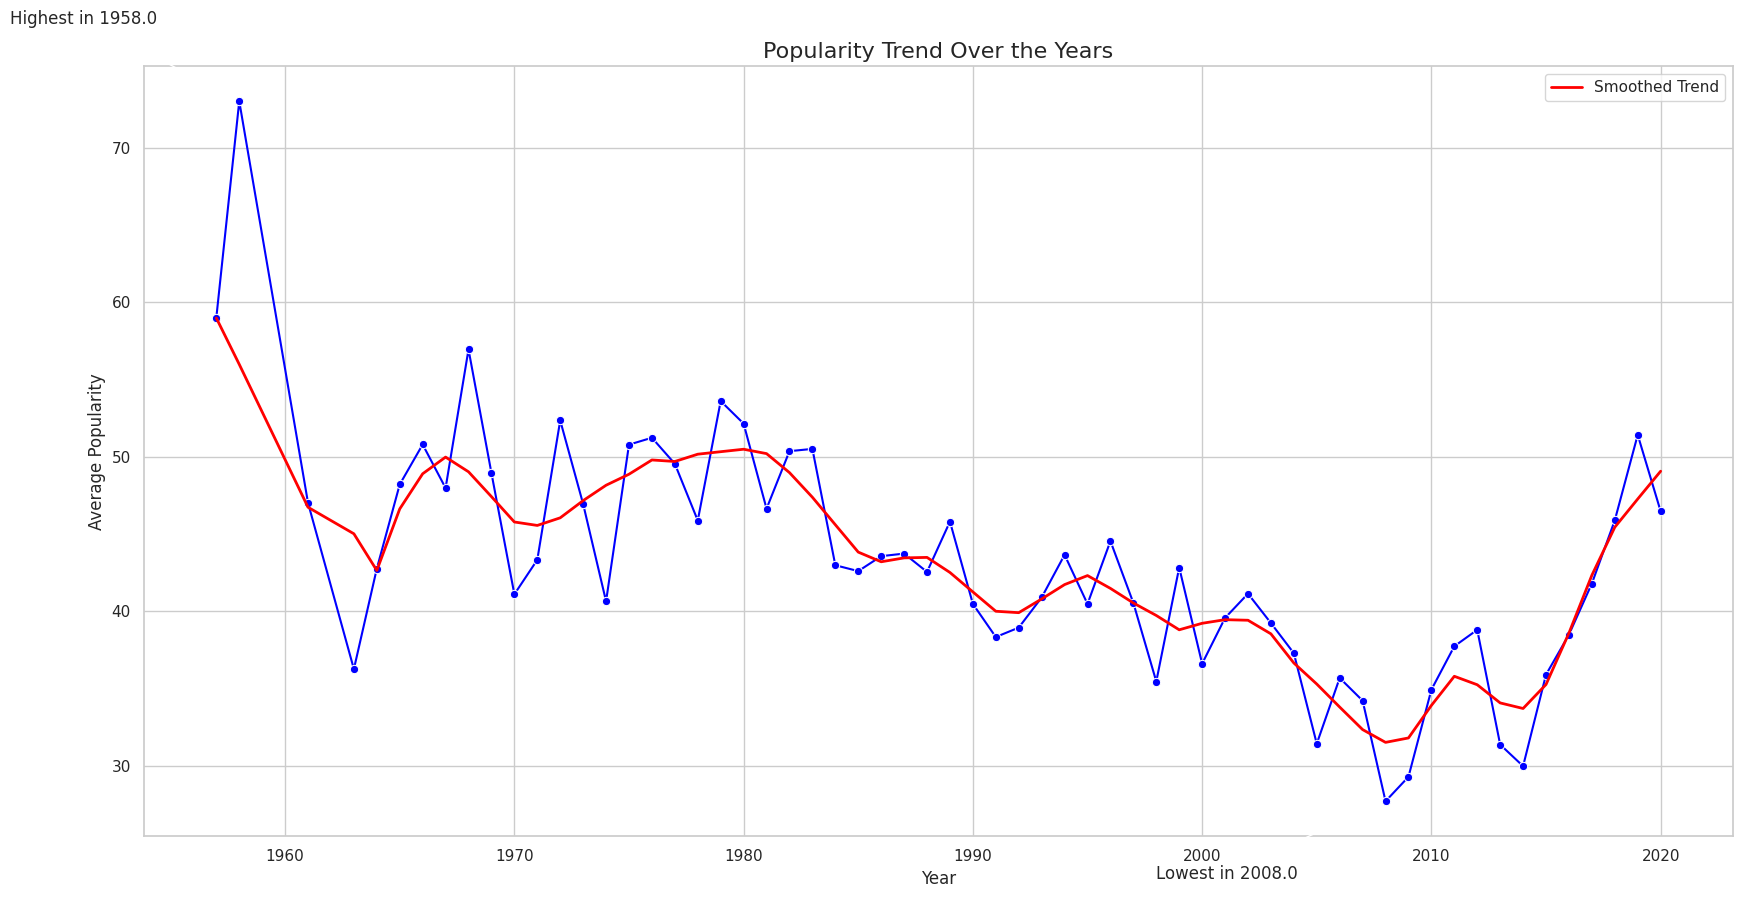

In [13]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Assuming your DataFrame is named df and has 'track_popularity' and 'track_album_release_date' columns
#df['year'] = pd.to_datetime(df['track_album_release_date'], errors='coerce').dt.year

# Calculate the average popularity for each year
yearly_popularity = data.groupby('year')['track_popularity'].mean()

# Calculate smoothed trend line
smoothed = lowess(yearly_popularity.values, yearly_popularity.index, frac=0.1)

plt.figure(figsize=(20.5, 10))
sns.lineplot(x=yearly_popularity.index, y=yearly_popularity.values, marker='o', color='blue')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', lw=2, label='Smoothed Trend')
plt.title('Popularity Trend Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)

# Annotate the peak and trough
max_year = yearly_popularity.idxmax()
max_value = yearly_popularity.max()
plt.annotate(f'Highest in {max_year}', xy=(max_year, max_value), xytext=(max_year-10, max_value+5),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

min_year = yearly_popularity.idxmin()
min_value = yearly_popularity.min()
plt.annotate(f'Lowest in {min_year}', xy=(min_year, min_value), xytext=(min_year-10, min_value-5),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.legend()
plt.show()

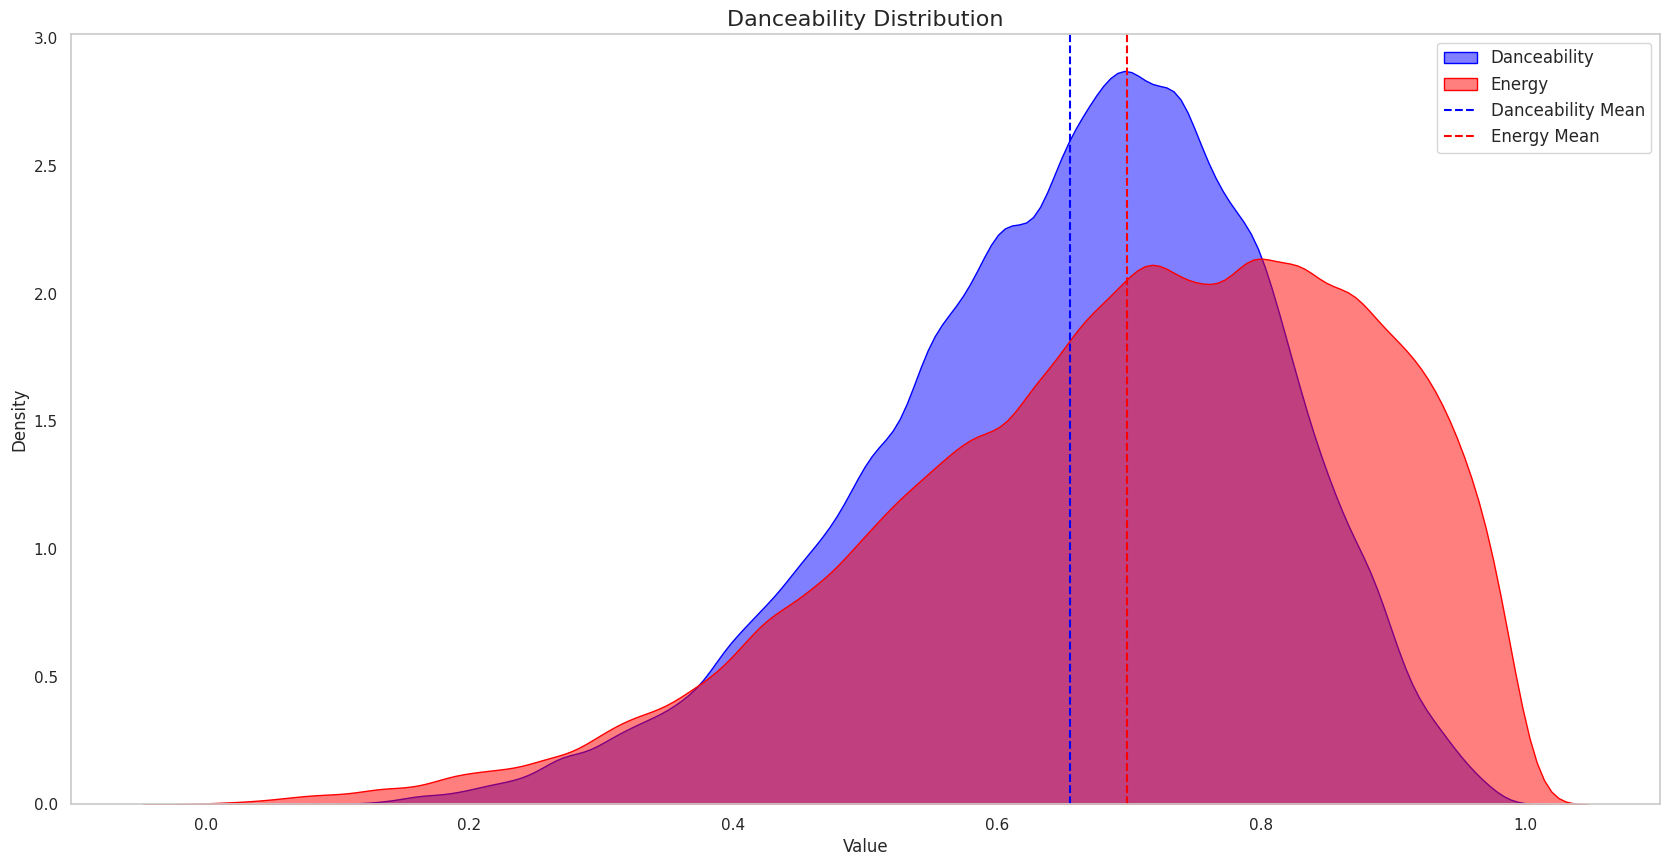

In [14]:
# plot Danceability Distribution
plt.figure(figsize=(20.5, 10))
sns.kdeplot(df['danceability'], shade=True, label='Danceability', color='blue', alpha=0.5, bw_adjust=0.7)
sns.kdeplot(df['energy'], shade=True, label='Energy', color='red', alpha=0.5, bw_adjust=0.7)
plt.axvline(df['danceability'].mean(), color='blue', linestyle='--', label='Danceability Mean')
plt.axvline(df['energy'].mean(), color='red', linestyle='--', label='Energy Mean')
plt.title('Danceability Distribution', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(False)
plt.show()

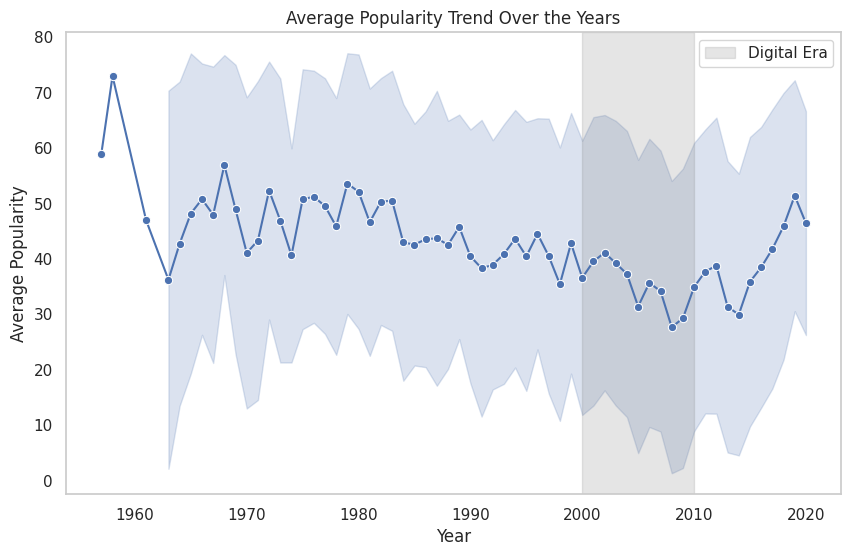

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='track_popularity', data=data, ci='sd', marker='o')
plt.axvspan(2000, 2010, color='gray', alpha=0.2, label='Digital Era')
plt.title('Average Popularity Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.legend()
plt.grid(False)
plt.show()

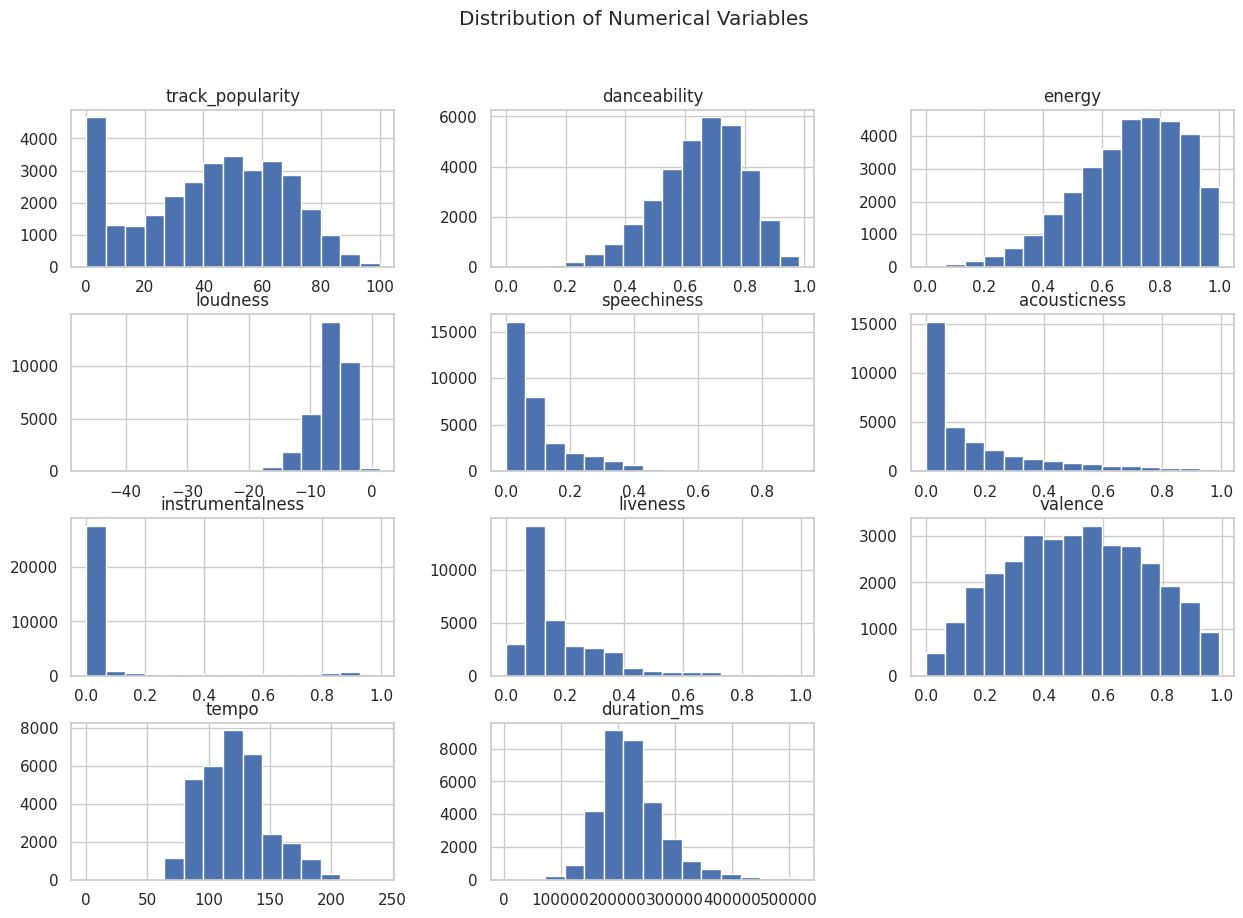


playlist_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

track_artist
Martin Garrix                161
Queen                        136
The Chainsmokers             123
David Guetta                 110
Don Omar                     102
Drake                        100
Dimitri Vegas & Like Mike     93
Calvin Harris                 91
Hardwell                      84
Kygo                          83
Name: count, dtype: int64


In [16]:
numerical_columns = ['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

df[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

# Frequency of categorical variables
print()
print(df['playlist_genre'].value_counts())

# Top 10 most frequent artists
print()
print(df['track_artist'].value_counts().head(10)) 

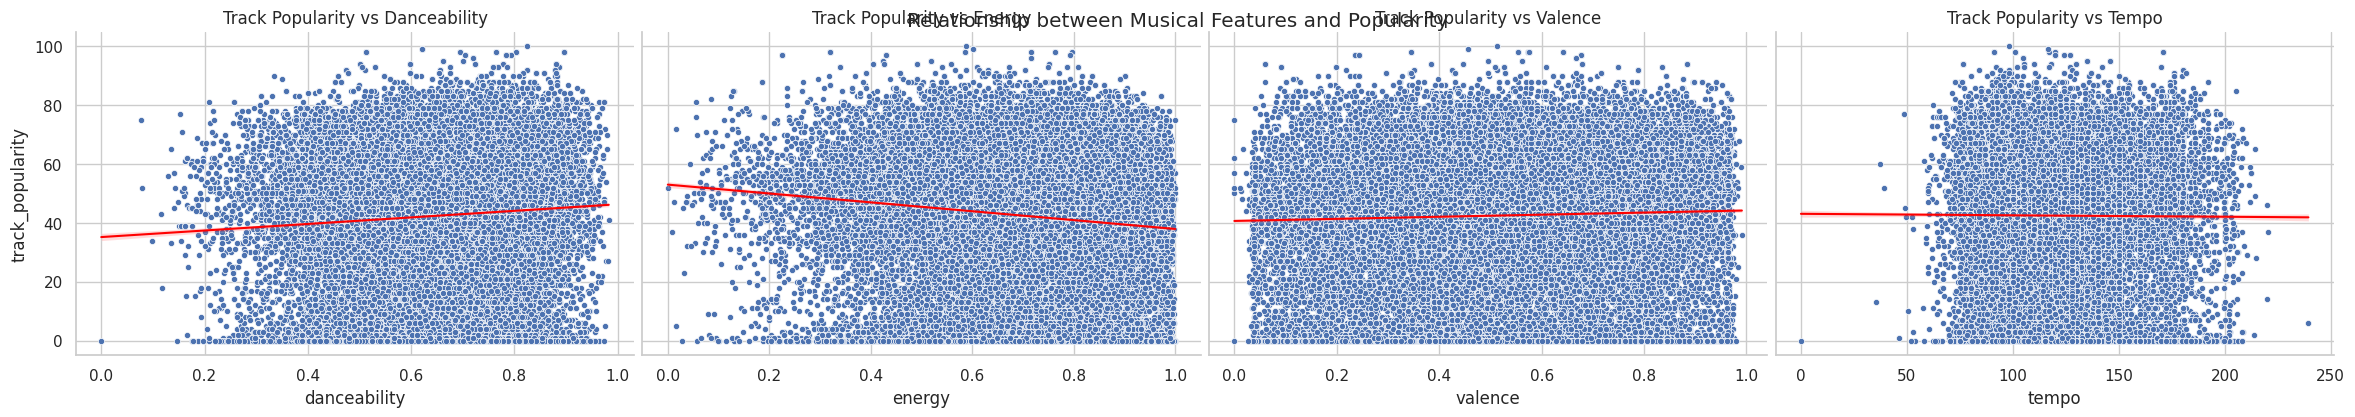

In [17]:
# Creating the pairplot with scatter plots
g = sns.pairplot(df,
                 x_vars=['danceability', 'energy', 'valence', 'tempo'],
                 y_vars='track_popularity',
                 height=4,
                 aspect=1.5,  # Aspect ratio to make the plots wider
                 kind='scatter',  # Keep scatter plot to customize points
                 plot_kws={'s': 20, 'edgecolor': 'w', 'linewidth': 0.5}  # Customize the point size and edges
)

# Manually adding regression lines
for ax in g.axes.flat:
    # Ensure we access the correct x and y data for the regression plot
    sns.regplot(
        x=ax.collections[0].get_offsets()[:, 0],  # Extracting x data from scatter plot
        y=ax.collections[0].get_offsets()[:, 1],  # Extracting y data from scatter plot
        ax=ax,
        scatter=False,  # Hide the scatter plot in the regplot to avoid duplication
        color='red',
        line_kws={'linewidth': 1.5}  # Customize the regression line width
    )

# Adding titles for each subplot
for ax, feature in zip(g.axes.flat, ['Danceability', 'Energy', 'Valence', 'Tempo']):
    ax.set_title(f'Track Popularity vs {feature}')

# Adding a general title for the entire figure
plt.suptitle('Relationship between Musical Features and Popularity', y=1.02)

# Display the plot
plt.show()

# Part 3 - Training and testing division

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Splitting the dataset into training and testing
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

print("Viewing training x_train", train_data.shape)
print("Viewing test test_data", test_data.shape)

Viewing training x_train (24624, 23)
Viewing test test_data (8209, 23)


# Part 4 - Matrix interaction

### What is an Interaction Matrix?

An **interaction matrix** is a core concept in recommendation systems, particularly those based on **Collaborative Filtering**. It is a table (or matrix) that captures the relationships between two sets of entities, such as users and items (e.g., songs, movies, products), in a format that can be processed by recommendation algorithms.

An **interaction matrix** is a matrix where:

- **Rows** represent one set of entities, typically users.
- **Columns** represent another set of entities, typically items (such as songs, movies, or products).
- **Entries** in the matrix indicate the interaction between a user and an item.

These interactions can be:

- **Explicit:** Where users provide direct feedback, such as ratings for a movie (e.g., 1 to 5 stars).
- **Implicit:** Where the interaction is inferred from user behavior, such as the number of times a song was played, whether a product was purchased, or if an item was viewed.

### Example

Consider an example of an interaction matrix for a music recommendation system:

| User \ Track | Track 1 | Track 2 | Track 3 | Track 4 |
|--------------|---------|---------|---------|---------|
| User 1       | 5       | 0       | 3       | 0       |
| User 2       | 0       | 2       | 0       | 4       |
| User 3       | 1       | 0       | 5       | 3       |

Here:

- `User 1` rated `Track 1` with a 5, `Track 3` with a 3, and did not rate `Tracks 2` or `4`.
- `User 2` rated `Track 2` with a 2, and `Track 4` with a 4, and did not rate `Tracks 1` or `3`.
- `User 3` rated `Track 1` with a 1, `Track 3` with a 5, and `Track 4` with a 3, and did not rate `Track 2`.

### Usage

- **Recommendation:** The interaction matrix is used by recommendation algorithms to predict which items (songs, movies, etc.) a user might like based on the interactions of other users with similar items.

- **Collaborative Filtering:** This type of recommendation system uses the interaction matrix to identify patterns and similarities between users (User-based Collaborative Filtering) or between items (Item-based Collaborative Filtering).

### Construction of the Matrix

To construct an interaction matrix in Python, you can use the `pivot` function from pandas, as shown below:

### Conclusion

An interaction matrix is a foundational component of many recommendation systems, as it summarizes the relationships between users and items in a structure that can be easily analyzed to generate personalized recommendations.

In [19]:
# Converting to numpy matrix interaction_matrix_matrix = interaction_matrix.values
interaction_matrix = train_data.pivot_table(index='playlist_id', columns='track_id', values='track_popularity').fillna(0) 

# Part 5 - Finding the value of K

### Definição para Encontrar o Valor de `k`

**Finding the Value of `k`:** 

In machine learning, particularly in **K-Nearest Neighbors (KNN)** algorithms, the value of `k` determines the number of nearest neighbors that are taken into account when making a prediction or classification. Choosing the right value of `k` is essential because it significantly affects the model's performance.

### Key Considerations:

1. **Small `k`:** 
   - A small value of `k`, such as `k=1`, makes the model sensitive to noise in the data. The model might have high variance, leading to overfitting, as it tries to perfectly match the training data.

2. **Large `k`:** 
   - A larger value of `k` provides a smoother decision boundary, which might reduce variance but increase bias. While this may improve generalization, it could also lead to underfitting, where the model is too simplistic.

3. **Odd `k`:**
   - An odd value for `k` is often preferred in binary classification problems to avoid ties, especially when the number of classes is even.

### Finding the Optimal `k`:

1. **Cross-Validation:**
   - The most common method to find the optimal value of `k` is to use cross-validation. This involves running the algorithm with different values of `k` and selecting the one that provides the best performance on a validation dataset.

2. **Elbow Method:**
   - Similar to how it’s used in clustering, the elbow method can also be applied by plotting the error rate against different values of `k`. The point where the error rate starts to flatten out is typically chosen as the optimal `k`.

3. **Grid Search:**
   - A systematic way of searching for the optimal `k` by evaluating the model's performance across a range of `k` values.

### Conclusion

Finding the right value of `k` is a balance between ensuring the model is complex enough to capture patterns in the data (but not too complex that it overfits) and simple enough to generalize well to new data (but not too simple that it underfits).

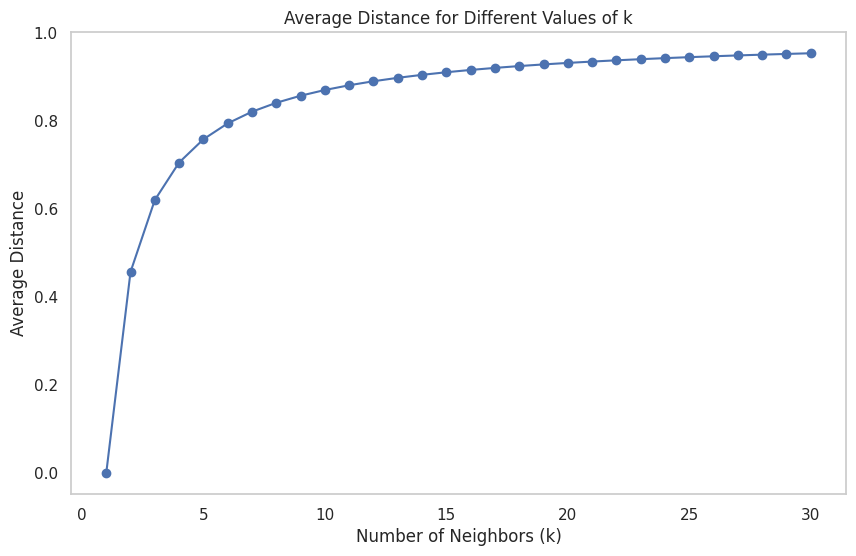

Best value of k: 1


In [20]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

# List of k values to test
k_values = list(range(1, 31))

# Metric to store the results
mean_distances = []

# Loop to find the best k
for k in k_values:
    model = NearestNeighbors(n_neighbors=k, metric='cosine')
    model.fit(interaction_matrix)
    
    # Compute the distances and indices of the nearest neighbors
    distances, indices = model.kneighbors(interaction_matrix)
    
    # Calculate the average distance to the nearest neighbors
    mean_distance = np.mean(distances)
    mean_distances.append(mean_distance)

# Plotting the average distance metric for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_distances, marker='o')
plt.title('Average Distance for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Distance')
plt.grid(False)
plt.show()

# Find the best k (the one that minimizes the average distance)
best_k = k_values[np.argmin(mean_distances)]
print(f"Best value of k: {best_k}")

# Part 6 - Machine learning Collaborative Filtering-Based Recommendation Model

## Definition

### Collaborative Filtering

Collaborative Filtering is a popular technique for recommendation systems that relies on the behavior and preferences of multiple users to make personalized recommendations.

### Steps to Implement Collaborative Filtering

1. **Data Preparation:**
   - **User-Item Matrix Creation:** Construct a matrix where rows represent users and columns represent items (songs in this case). The value in each cell represents the interaction between a user and a song, such as a rating or the number of times the song was played.
   - **Handling Missing Values:** If a user has not interacted with a song, the corresponding cell can be treated as zero or left as missing.

2. **Choose the Algorithm:**
   - **User-Based Collaborative Filtering:**
     - **Objective:** Recommend songs that similar users liked.
   - **Item-Based Collaborative Filtering:**
     - **Objective:** Recommend songs similar to the ones a user has already liked.
   - **Matrix Factorization:** Techniques like Singular Value Decomposition (SVD) can be used to reduce the dimensionality of the matrix and capture latent structures in user-item interactions.

### Explanation:
- **KNN:** K-Nearest Neighbors is used here to find similar users or items based on the cosine similarity metric.
- **User-Based Filtering:** You can change the focus to item-based filtering by switching the perspective from users to items in the matrix.
- **Dimensionality Reduction:** Advanced techniques like SVD can further enhance the model by capturing latent factors in the data.

### Next Steps:
- **Experiment with Different Metrics:** You can try different similarity metrics like `cosine`, `pearson`, etc., to see which works best.
- **Hyperparameter Tuning:** Adjust the `n_neighbors` parameter to find the optimal number of neighbors for your recommendations.
- **Cross-Validation:** Use cross-validation to ensure your model generalizes well to unseen data.

In [21]:
# Adjusting k to test a larger value 
model = NearestNeighbors(n_neighbors=best_k, metric='cosine')
model.fit(interaction_matrix)

NearestNeighbors(metric='cosine', n_neighbors=1)

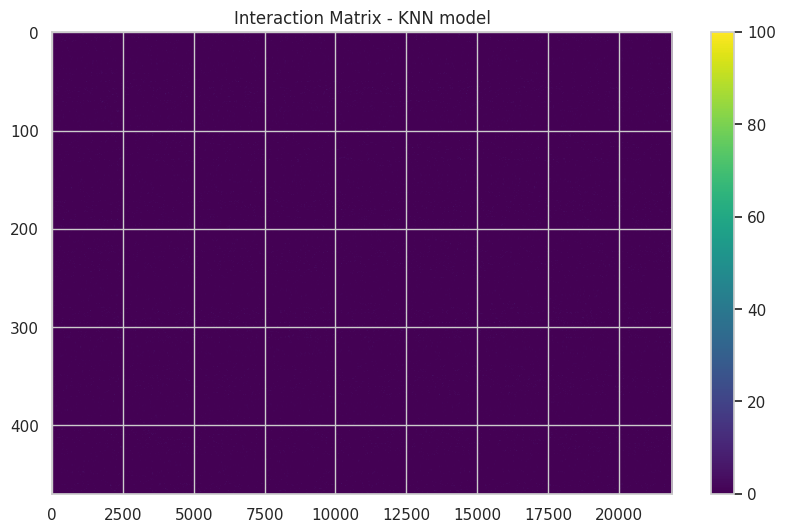

In [22]:
# Plotting the Interaction Matrix
plt.figure(figsize=(10, 6))
plt.imshow(interaction_matrix, aspect='auto', cmap='viridis')
plt.title('Interaction Matrix - KNN model')
plt.colorbar()
plt.show()

The heatmap you've generated, titled "Matriz de Interação," visually represents the values within your interaction matrix. Each cell in the matrix corresponds to the interaction between a user (represented by the rows) and an item (represented by the columns). The color of each cell indicates the strength or magnitude of the interaction, with the color bar on the right showing the scale from lower values (darker colors) to higher values (brighter colors).

### Key Observations:
1. **Color Distribution**: The matrix appears to have a varied distribution of interaction values, with a mix of lower and higher interactions spread across the matrix. The presence of different colors suggests that the interaction data is not homogeneous, which could be useful for making distinctions between different users or items.

2. **Patterns**: The heatmap does not show obvious, large-scale patterns such as vertical or horizontal bands, which suggests that interactions might be spread relatively evenly among users and items. However, smaller clusters or patterns might be present.

3. **Interpretation**: If this matrix represents, for example, user ratings of items or user-item interactions, the varied colors indicate differences in user preferences or engagement. Areas with brighter colors could represent items that are more popular or users that are more active, whereas darker areas might indicate lower interactions.

# Part 7 - Making recommendation

In [23]:
data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014.0
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013.0
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014.0
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014.0


In [24]:
# Predefined song to base recommendations on
# Replace with the song you want to start with
default_song_name = "Someone You Loved - Future Humans Remix"  

def recommend_songs(df, model, interaction_matrix, song_name=default_song_name, k=10):
    # Find the playlist(s) that contain the predefined song
    song_playlists = df[df['track_name'].str.contains(song_name, case=False, na=False)]['playlist_id'].unique()
    
    if len(song_playlists) == 0:
        print("Song not found in the dataset.")
        return
    
    # Get the index of the first playlist where the song was found
    playlist_id = song_playlists[0]
    
    # Get unique playlist IDs and their corresponding indices in interaction_matrix
    unique_playlists = df['playlist_id'].unique()
    
    if playlist_id not in unique_playlists:
        print("Playlist ID not found in unique playlists.")
        return
    
    playlist_index = np.where(unique_playlists == playlist_id)[0][0]
    
    # Find similar playlists using KNN
    try:
        # If interaction_matrix is a DataFrame, use .iloc to get the row
        if isinstance(interaction_matrix, pd.DataFrame):
            distances, indices = model.kneighbors(interaction_matrix.iloc[playlist_index].values.reshape(1, -1), n_neighbors=k+1)
        else:
            distances, indices = model.kneighbors(interaction_matrix[playlist_index].reshape(1, -1), n_neighbors=k+1)
    except IndexError:
        print("Playlist index is out of bounds in the interaction matrix.")
        return
    
    # Remove the index of the original playlist
    similar_playlists = indices.flatten()[1:]  # Ignoring the first one, which is the original playlist
    
    # Identify songs to recommend
    original_playlist_tracks = set(df[df['playlist_id'] == playlist_id]['track_id'])
    recommended_tracks = set()

    for idx in similar_playlists:
        similar_playlist_id = unique_playlists[idx]
        similar_playlist_tracks = set(df[df['playlist_id'] == similar_playlist_id]['track_id'])
        recommended_tracks.update(similar_playlist_tracks - original_playlist_tracks)

    # Display the recommended songs
    if recommended_tracks:
        recommended_tracks_info = df[df['track_id'].isin(recommended_tracks)][['track_name', 'track_artist']].drop_duplicates()
        print("Recommended songs")
        print(recommended_tracks_info)
    else:
        print("No new songs to recommend.")

# Example usage
# Assuming df, model, and interaction_matrix are already defined
print("Música selecionada", default_song_name)
recommend_songs(df, model, interaction_matrix)

Música selecionada Someone You Loved - Future Humans Remix
Recommended songs
                       track_name               track_artist
499            Break the Distance                      ELYAZ
500      I Could Get Used To This                 Becky Hill
501                       Therapy           Armin van Buuren
502                      Sunshine               David Guetta
503    Giant - Robin Schulz Remix              Calvin Harris
...                           ...                        ...
29026                     Turn Up  Dimitri Vegas & Like Mike
29027                 Ahura Mazda                  Sharp Man
29028                      Access                        TBR
29029                  Back Again                  Bullistik
29030                      Anthem               Michael June

[719 rows x 2 columns]


# Part 8 - Euclidean distance

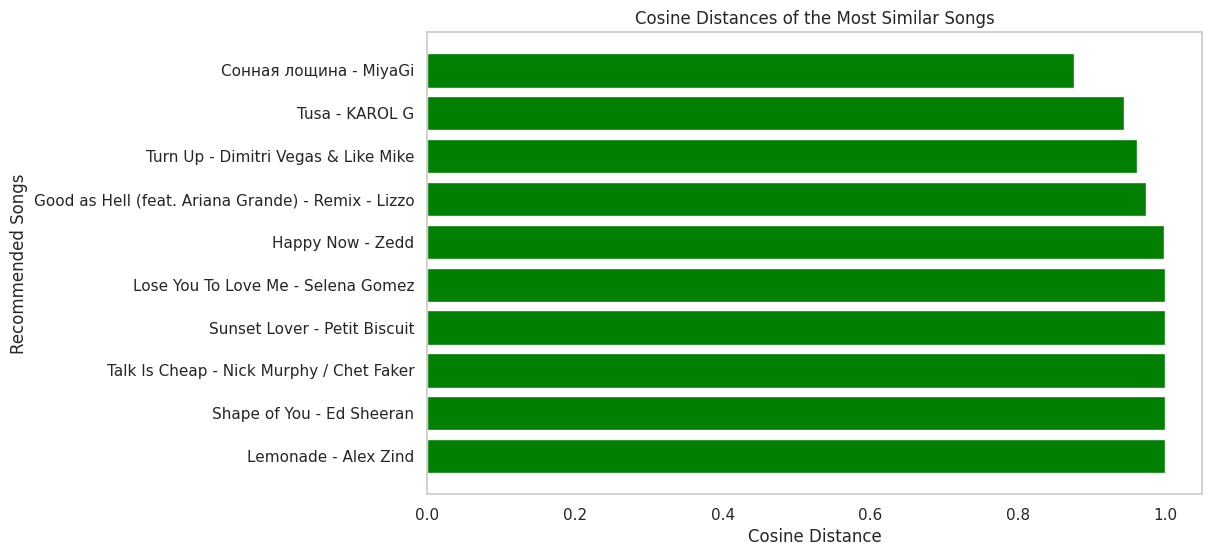

In [25]:
from sklearn.metrics.pairwise import cosine_distances

def plotar_distancias_musicas(interaction_matrix, df, playlist_index, k=10):
    # Calculate the cosine distance between the selected playlist and all others
    if isinstance(interaction_matrix, pd.DataFrame):
        cosine_distances_array = cosine_distances(interaction_matrix.iloc[playlist_index].values.reshape(1, -1), interaction_matrix)
    else:
        cosine_distances_array = cosine_distances(interaction_matrix[playlist_index].reshape(1, -1), interaction_matrix)
    
    # Sort the playlists based on the cosine distance
    sorted_indices = cosine_distances_array.argsort().flatten()
    
    # Ignore the first index as it will be the playlist itself
    similar_playlists = sorted_indices[1:k+1]
    
    # Extract the cosine distances of the recommended playlists
    similar_playlists_distances = cosine_distances_array.flatten()[similar_playlists]
    
    # Map the most popular songs from each similar playlist
    music_names = []
    for idx in similar_playlists:
        playlist_id = df['playlist_id'].unique()[idx]
        popular_music = df[df['playlist_id'] == playlist_id].sort_values(by='track_popularity', ascending=False).iloc[0]
        music_names.append(f"{popular_music['track_name']} - {popular_music['track_artist']}")
    
    # Plot the cosine distances
    plt.figure(figsize=(10, 6))
    plt.barh(music_names, similar_playlists_distances, color='green')
    plt.xlabel('Cosine Distance')
    plt.ylabel('Recommended Songs')
    plt.title('Cosine Distances of the Most Similar Songs')
    plt.gca().invert_yaxis()  # Invert y-axis so the most similar song is at the top
    plt.grid(False)
    plt.show()

# Example usage
playlist_index = 0  # Replace with the index of the playlist you want to analyze
plotar_distancias_musicas(interaction_matrix, df, playlist_index, k=10)

 **Playlist Optimization**: The business team can use this graph to curate or enhance playlists by adding songs that are similar to those already in a popular playlist. This can help in maintaining a consistent user experience in terms of music style and genre.

- **Personalized Recommendations**: By understanding which songs are similar to those a user already likes, the business can make more personalized recommendations, increasing user engagement and satisfaction.

- **Content Strategy**: The data can be used to identify which types of songs tend to cluster together, helping the business team understand trends in music preferences. This information can guide decisions about what new music or playlists to promote.

- **Reducing Churn**: Offering users songs that are very similar to those they already enjoy can help in keeping them engaged with the platform, reducing the likelihood that they will churn or lose interest.

This graph provides a clear visual representation of song similarities, helping the business team make informed decisions about playlist management, user engagement strategies, and music recommendation approaches.

# Part 9 - Recommendation system - Group songs into clusters based on their characteristics and recommend songs within these clusters

A **Recommendation System** is an algorithmic tool that suggests items to users based on various criteria. In the context of music, a recommendation system analyzes the characteristics of songs, such as genre, tempo, energy, and other audio features, and groups them into clusters. These clusters represent groups of songs that share similar attributes. Once the songs are clustered, the recommendation system can suggest songs to users based on the clusters they are likely to enjoy. For example, if a user enjoys songs in a particular cluster, the system will recommend other songs within that cluster, ensuring the recommendations align with the user's musical preferences.

This approach allows for more personalized recommendations, as it considers the inherent similarities between songs, making it easier to suggest new music that fits a user's taste.

In [26]:
# Database 
data = pd.read_csv("/kaggle/input/30000-spotify-songs/spotify_songs.csv") 
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [27]:
# 1. Select the relevant features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

X = data[features]

In [28]:
# Scaling data
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Viewing
scaler

StandardScaler()

# Number of Clusters

**Number of Clusters** refers to the number of distinct groups or segments identified within a dataset when performing cluster analysis. Clustering is a technique used in data analysis and machine learning to group similar data points together based on certain characteristics or features. 

### In More Detail:

1. **Clusters**:
   - A cluster is a collection of data points that are more similar to each other than to data points in other clusters. The similarity is often determined using distance metrics like Euclidean distance, cosine similarity, etc.
   - Each cluster represents a group of data points that share certain traits, making them distinct from points in other clusters.

2. **Number of Clusters**:
   - The "Number of Clusters" is the count of these distinct groups. For example, if you set the number of clusters to 3 in a clustering algorithm, the algorithm will partition the data into 3 distinct groups.
   - The selection of the number of clusters (often denoted as *k* in algorithms like k-means) is a critical decision. If the number of clusters is too low, distinct groups in the data may be merged together; if it's too high, you may split data into too many small, less meaningful groups.

3. **Determining the Optimal Number of Clusters**:
   - Choosing the right number of clusters is essential for effective clustering. Some common methods to determine the optimal number of clusters include:
     - **Elbow Method**: Plotting the sum of squared distances within clusters against the number of clusters. The optimal number of clusters is often found where the plot forms an "elbow."
     - **Silhouette Score**: Measures how similar a point is to its own cluster compared to other clusters. Higher silhouette scores indicate better clustering.
     - **Gap Statistic**: Compares the total within intra-cluster variation for different numbers of clusters with their expected values under null reference distribution of the data.

### Example in Business Context:

- In customer segmentation, you might want to cluster your customers into groups based on their purchasing behavior. The number of clusters might represent the different customer segments you want to target with different marketing strategies. For example, if the algorithm identifies 3 clusters, they could represent high-value customers, medium-value customers, and low-value customers.

Understanding and selecting the right number of clusters is key to effective segmentation and analysis, enabling more precise targeting and decision-making.decisão mais precisas.

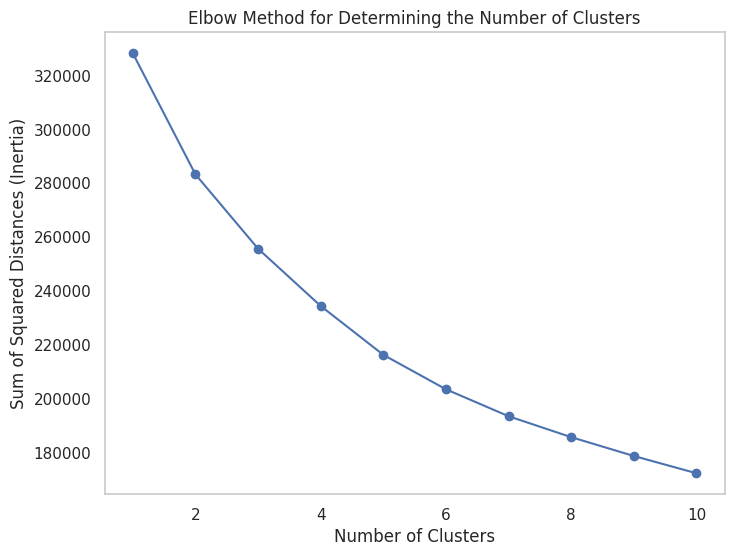

In [29]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Determining the Number of Clusters')
plt.grid(False)
plt.show()

In [30]:
# 4. Apply K-Means with the chosen number of clusters
# Assume the optimal number of clusters is 5 (adjust as per the elbow plot)
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster_kmeans'] = kmeans.fit_predict(X_scaled)
kmeans

KMeans(n_clusters=4, random_state=42)

In [31]:
# Viewing total cluster
data.cluster_kmeans.value_counts()

cluster_kmeans
1    13961
2    10854
3     5410
0     2608
Name: count, dtype: int64

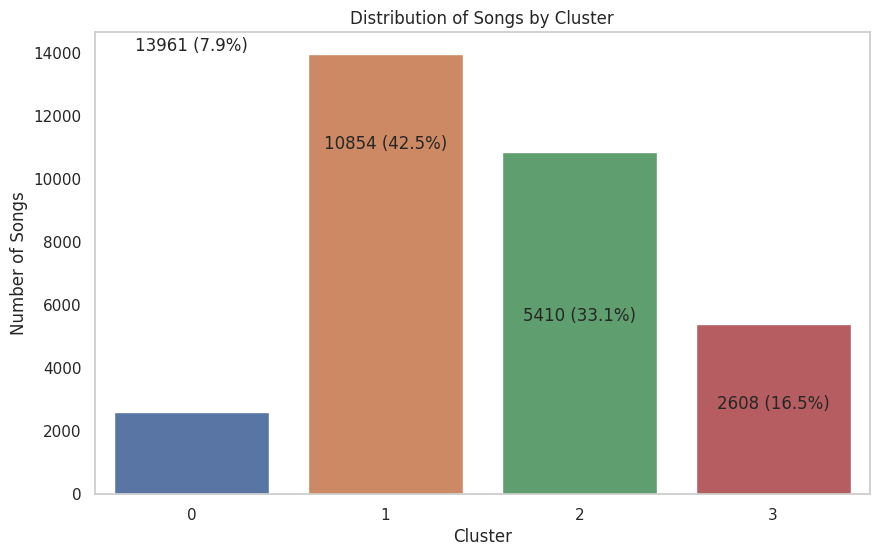

In [32]:
# Count of songs in each cluster
cluster_counts = data['cluster_kmeans'].value_counts().sort_values(ascending=False)

# Calculate the percentage of each cluster
total_songs = cluster_counts.sum()
cluster_percentages = (cluster_counts / total_songs) * 100

# Plot the distribution of clusters with percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='deep')
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.title('Distribution of Songs by Cluster')

# Adding data labels on top of bars
for index, value in enumerate(cluster_counts):
    plt.text(index, value + 100, f'{value} ({cluster_percentages[index]:.1f}%)', ha='center', fontsize=12)

plt.grid(False)
plt.show()

# Part 9.1 - PCA 

Applying Principal Component Analysis (PCA) in a recommendation system can be beneficial for several reasons, particularly when dealing with high-dimensional data. Here’s why PCA might be applied in the context of a recommendation system:

### 1. **Dimensionality Reduction**:
   - **High-Dimensional Data**: In music recommendation systems, you might have a large number of features for each song, such as tempo, energy, valence, loudness, danceability, and more. These features create a high-dimensional space.
   - **Reducing Complexity**: PCA helps reduce the number of dimensions while retaining most of the variance (information) in the data. This simplifies the dataset, making the recommendation system more computationally efficient and faster.

### 2. **Noise Reduction**:
   - **Removing Redundant Information**: High-dimensional data often contains noise or redundant features that don’t contribute much to the decision-making process. PCA can help eliminate these less informative features, which might improve the accuracy of the recommendation system.
   - **Enhancing Signal**: By focusing on the principal components (the most significant features), the recommendation system can better capture the underlying patterns in the data, leading to more relevant recommendations.

### 3. **Improved Model Performance**:
   - **Avoiding Overfitting**: In a high-dimensional space, models can become too complex and overfit the training data. PCA helps reduce the risk of overfitting by reducing the number of features, which can lead to a more generalizable model.
   - **Efficiency in Algorithms**: Algorithms like k-means clustering or k-nearest neighbors (KNN) used in recommendation systems can perform better and faster in a reduced-dimensional space. This makes PCA particularly useful in the preprocessing stage before applying such algorithms.

### 4. **Visualization**:
   - **Understanding Data Clusters**: PCA can reduce dimensions to a level where the data can be visualized (e.g., in 2D or 3D). This visualization helps understand the clusters of songs, their relationships, and the distribution of user preferences, which can inform and refine the recommendation strategies.

### 5. **Dealing with Sparsity**:
   - **Sparse Interaction Matrices**: In collaborative filtering, the user-item interaction matrix is often sparse (many zeros). PCA can help by compressing the matrix into a lower-dimensional space where the patterns (e.g., user preferences) become more apparent.

### Summary:
Applying PCA in a recommendation system is a strategic way to reduce dimensionality, enhance the signal-to-noise ratio, and improve computational efficiency. By transforming the data into a lower-dimensional space, PCA allows the recommendation system to work more effectively, making it faster and potentially more accurate in providing personalized suggestions.

In [33]:
from sklearn.decomposition import PCA

# 2. Perform PCA Analysis
# Initialize the PCA model specifying the number of components to reduce to (in this case, 2 components).
pca = PCA(n_components=2)

# Apply PCA on the scaled feature set X_scaled and transform the data into the new 2-dimensional space.
X_pca = pca.fit_transform(X_scaled)

# Output the PCA model object, which contains information such as the amount of variance explained by each principal component.
pca

PCA(n_components=2)

# Part 10 - Cluster visualization 

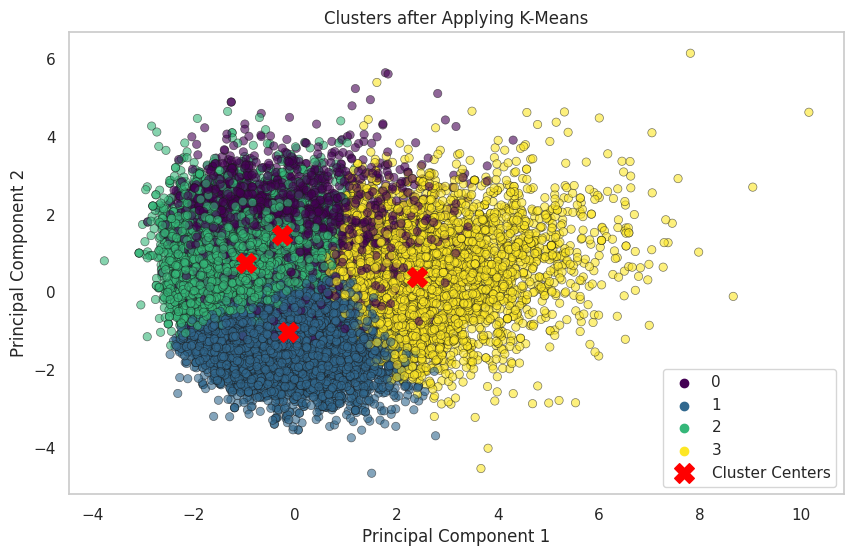

In [34]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['cluster_kmeans'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], 
                y=X_pca[:, 1], 
                hue=data['cluster_kmeans'], 
                palette='viridis', 
                alpha=0.6, 
                edgecolor='k')

# Adding the cluster centers
centers = kmeans.cluster_centers_
# Projecting the centers to the 2D PCA space
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
            c='red', 
            s=200, 
            marker='X', 
            label='Cluster Centers')

plt.title('Clusters after Applying K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(False)
plt.show()

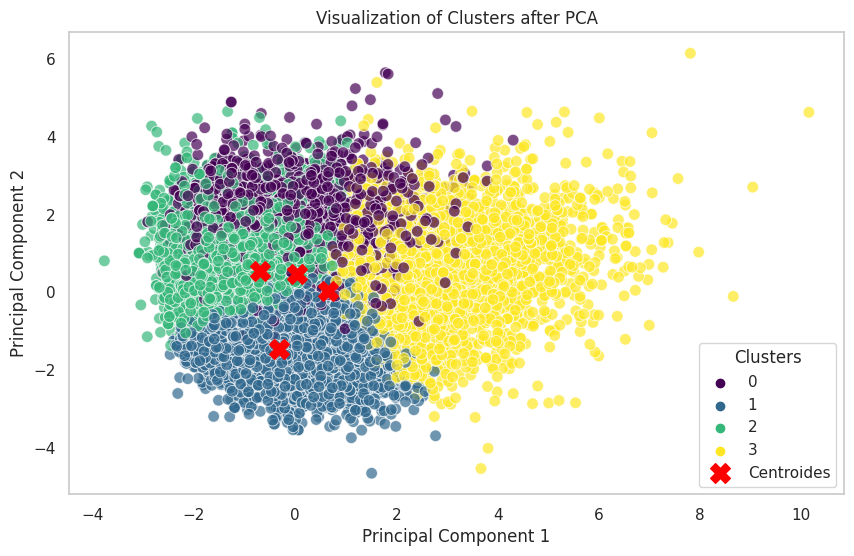

In [35]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['cluster_kmeans'], palette='viridis', s=70, alpha=0.7)

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroides')

plt.title('Visualization of Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters')
plt.grid(False)
plt.show()

In [36]:
# Assuming you want to calculate the mean of features for cluster 2 (since `== 2` is used)
cluster_1_features = data[data['cluster_kmeans'] == 0][features].mean()
print("Mean of Features for Cluster 0:")
print(cluster_1_features)
print()

# Assuming you want to calculate the mean of features for cluster 2 (since `== 2` is used)
cluster_2_features = data[data['cluster_kmeans'] == 1][features].mean()
print("Mean of Features for Cluster 1:")
print(cluster_2_features)
print()

# Assuming you want to calculate the mean of features for cluster 2 (since `== 2` is used)
cluster_3_features = data[data['cluster_kmeans'] == 2][features].mean()
print("Mean of Features for Cluster 2:")
print(cluster_3_features)
print()

# Assuming you want to calculate the mean of features for cluster 2 (since `== 2` is used)
cluster_4_features = data[data['cluster_kmeans'] == 3][features].mean()
print("Mean of Features for Cluster 3:")
print(cluster_4_features)
print()

Mean of Features for Cluster 0:
danceability             0.660783
energy                   0.785645
loudness                -6.945340
speechiness              0.072155
acousticness             0.071662
instrumentalness         0.736976
liveness                 0.189987
valence                  0.388463
tempo                  125.177837
duration_ms         251218.143788
dtype: float64

Mean of Features for Cluster 1:
danceability             0.750059
energy                   0.705554
loudness                -6.359302
speechiness              0.135351
acousticness             0.149499
instrumentalness         0.011301
liveness                 0.162959
valence                  0.651039
tempo                  114.119836
duration_ms         220087.808323
dtype: float64

Mean of Features for Cluster 2:
danceability             0.553881
energy                   0.799522
loudness                -5.306026
speechiness              0.087069
acousticness             0.072840
instrumentalness      

# Part 11 - Making Recommendation - Cluster Model

In [37]:
def recommend_songs_by_cluster_kmeans(song_name, data):
    # Search for the selected song in the dataset, ignoring case and handling missing values
    selected_song = data[data['track_name'].str.contains(song_name, case=False, na=False)]
    
    # If the song is not found, display a message and exit the function
    if selected_song.empty:
        print("Song not found.")
        return None
    
    # Retrieve the cluster to which the selected song belongs
    cluster = selected_song['cluster_kmeans'].values[0]
    
    # Find all songs that belong to the same cluster as the selected song
    recommended_songs = data[data['cluster_kmeans'] == cluster]
    
    # Exclude the selected song from the recommendations
    recommended_songs = recommended_songs[recommended_songs['track_name'] != selected_song['track_name'].values[0]]
    
    # Return only the 'track_name' and 'track_artist' columns, limited to the top 25 recommendations
    return recommended_songs[['track_name', 'track_artist']].head(30)

In [38]:
# Example of usage
# Replace with the name of the song you want to use as the base for recommendations
song_name = "Shape of You"  
top_recommendations_kmeans = recommend_songs_by_cluster_kmeans(song_name, data)

# If recommendations are found, print them
if top_recommendations_kmeans is not None:
    print("Recommended music")
    print(top_recommendations_kmeans)

Recommended music
                                           track_name        track_artist
0   I Don't Care (with Justin Bieber) - Loud Luxur...          Ed Sheeran
1                     Memories - Dillon Francis Remix            Maroon 5
4             Someone You Loved - Future Humans Remix       Lewis Capaldi
5   Beautiful People (feat. Khalid) - Jack Wins Remix          Ed Sheeran
10  Cross Me (feat. Chance the Rapper & PnB Rock) ...          Ed Sheeran
12                                         Body On My         Loud Luxury
15  South of the Border (feat. Camila Cabello & Ca...          Ed Sheeran
17  Say My Name (feat. Bebe Rexha & J Balvin) - Lu...        David Guetta
18  Dancing With A Stranger (With Normani) - Cheat...           Sam Smith
21     All Around The World (La La La) - Marnik Remix               R3HAB
23       Slow Dance (feat. Ava Max) - Sam Feldt Remix         AJ Mitchell
29            When You Leave - Breathe Carolina Remix        Nikki Vianna
32                  